<a href="https://colab.research.google.com/github/emanbuc/ultrasonic-vision/blob/main/notebooks/multiclass_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Addestramento classificatore con SciKit Learn

reference https://scikit-learn.org/stable/modules/multiclass.html


## Python Data Science Environment
 
Attenzione alle versione: il salvataggio su file ed il successivo caricamento dei modelli addestrati funziona bene solo se nell'ambiente di sviluppo (addestramento) e produzione (runtime) sono presenti le stesse versioni delle librerie. I package critici sono:

In [ ]:
import sklearn
import numpy as np
import sklearn 
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
import onnx,skl2onnx
import onnxruntime as ort
print("onnx: ", onnx.__version__)
print("onnxruntime: ", ort.__version__)
print("skl2onnx: ", skl2onnx.__version__)

from platform import python_version
print("python: ", python_version())


In [ ]:
import pandas
import matplotlib.pyplot as plt

## Dataset

Il dataset contiene le seguenti _features_ :

- Time: timestamp in formato "unix epoch" della misura riferito all'inizio dell'acquisizione dei dati 

- HCSR04_001 : distanza stimata dal sensore HCSR04_001 Type: FLOAT
- HCSR04_002 : distanza stimata dal sensore HCSR04_002 Type: FLOAT
- HCSR04_003 : distanza stimata dal sensore HCSR04_003 Type: FLOAT
- HCSR04_004 : distanza stimata dal sensore HCSR04_004 Type: FLOAT
- HCSR04_005 : distanza stimata dal sensore HCSR04_005 Type: FLOAT
- HCSR04_006 : distanza stimata dal sensore HCSR04_006 Type: FLOAT
- HCSR04_007 : distanza stimata dal sensore HCSR04_007 Type: FLOAT

- HCSR04_001_empty: Flag oggetto rilevato dal senzore HCSR04_001 Type: BOOLEAN
- HCSR04_002_empty: Flag oggetto rilevato dal senzore HCSR04_002 Type: BOOLEAN
- HCSR04_003_empty: Flag oggetto rilevato dal senzore HCSR04_003 Type: BOOLEAN
- HCSR04_004_empty: Flag oggetto rilevato dal senzore HCSR04_004 Type: BOOLEAN
- HCSR04_005_empty: Flag oggetto rilevato dal senzore HCSR04_005 Type: BOOLEAN
- HCSR04_006_empty: Flag oggetto rilevato dal senzore HCSR04_006 Type: BOOLEAN
- HCSR04_007_empty: Flag oggetto rilevato dal senzore HCSR04_007 Type: BOOLEAN

- HCSR04_001_BIN: Distanza stimata dal sensore HCSR04_001 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_002_BIN: Distanza stimata dal sensore HCSR04_002 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_003_BIN: Distanza stimata dal sensore HCSR04_003 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_004_BIN: Distanza stimata dal sensore HCSR04_004 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_005_BIN: Distanza stimata dal sensore HCSR04_005 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_006_BIN: Distanza stimata dal sensore HCSR04_006 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical
- HCSR04_007_BIN: Distanza stimata dal sensore HCSR04_007 come categoria  valori: NEAR, CENTER, FAR  Type: Categorical

## Analisi dati

Per un'analisi più estesa dei dati vedi anche il notebook [analisi dati sensori](https://github.com/emanbuc/ultrasonic-vision/blob/main/notebooks/analisi_dati_sensori.ipynb)


In [21]:

url = "../dataset/20210102_alldata_outliers_removed_additional_features.csv"
names = ["ObjectClass","HCSR04_001_empty","HCSR04_002_empty","HCSR04_003_empty","HCSR04_004_empty","HCSR04_005_empty","HCSR04_006_empty","HCSR04_007_empty","HCSR04_001_BIN","HCSR04_002_BIN","HCSR04_003_BIN","HCSR04_004_BIN","HCSR04_005_BIN","HCSR04_006_BIN","HCSR04_007_BIN"]

data = pandas.read_csv(url, usecols=names)



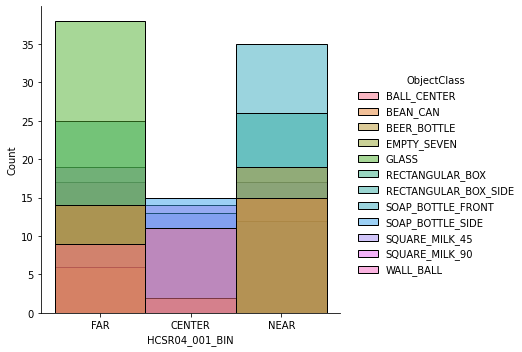

In [32]:
import seaborn as sns


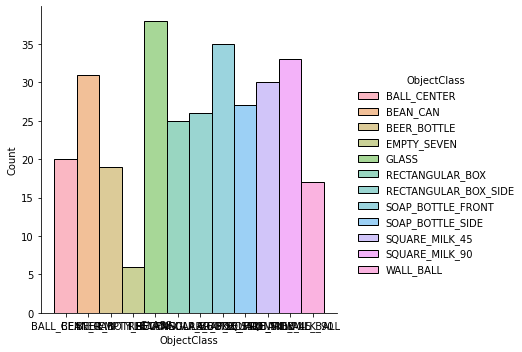

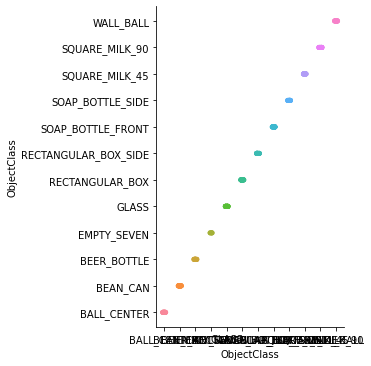

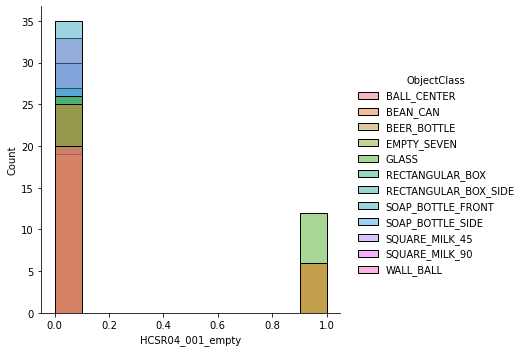

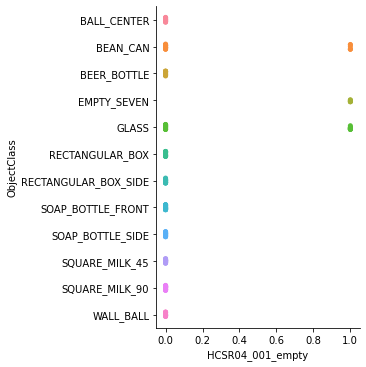

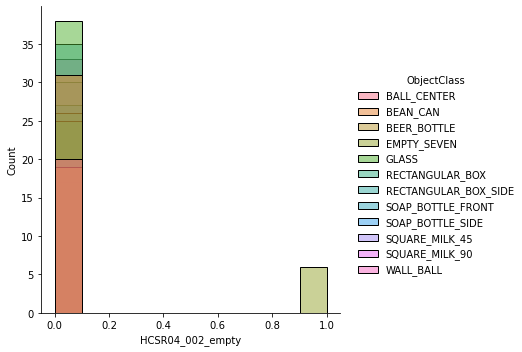

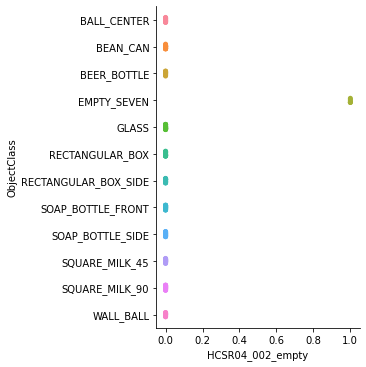

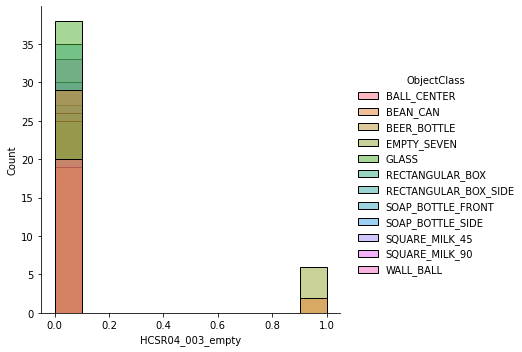

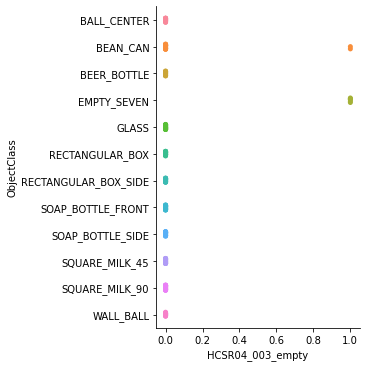

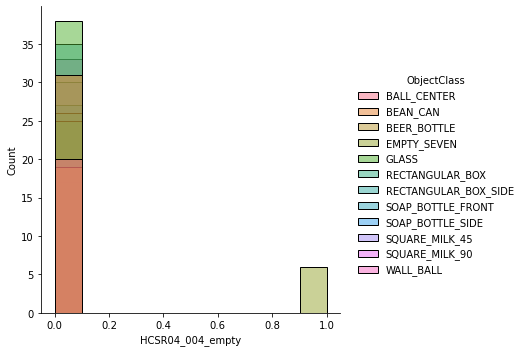

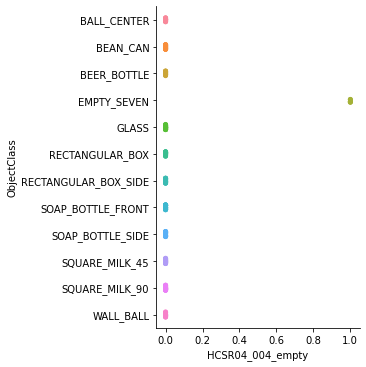

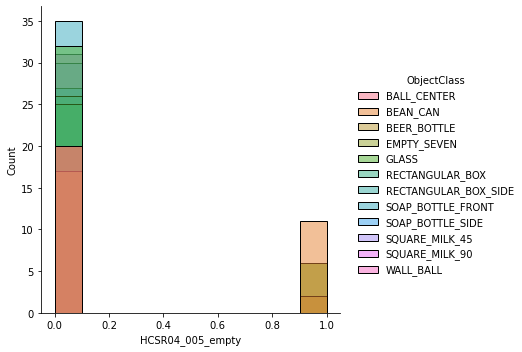

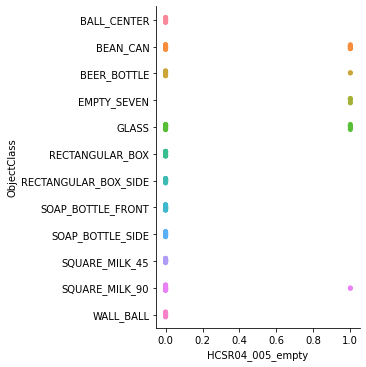

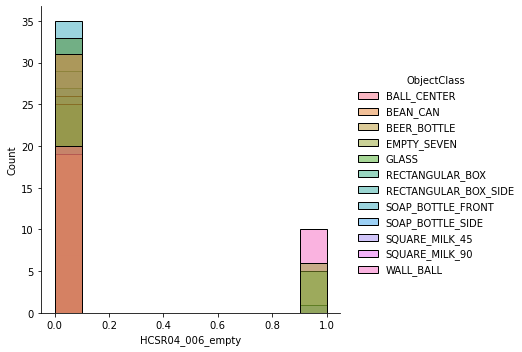

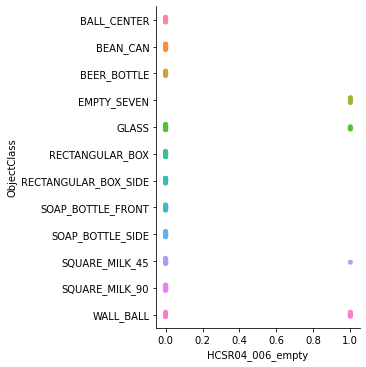

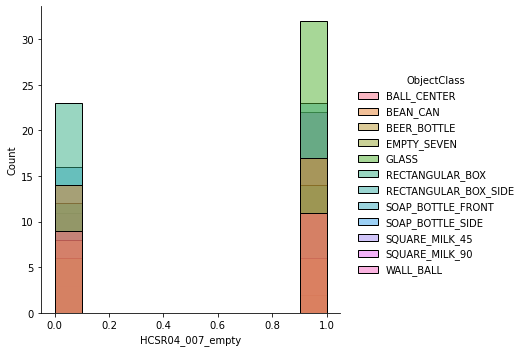

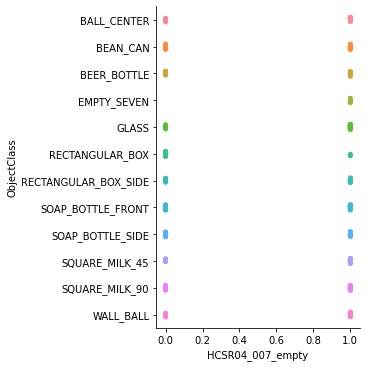

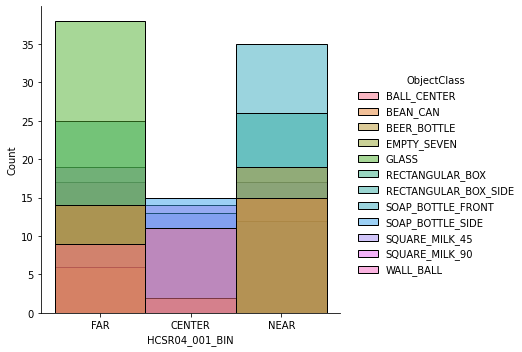

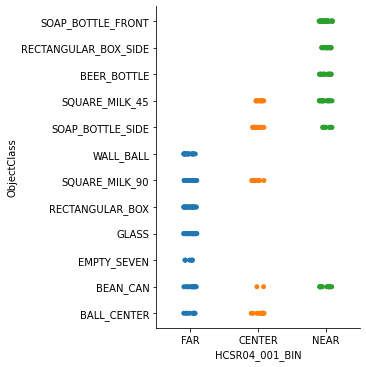

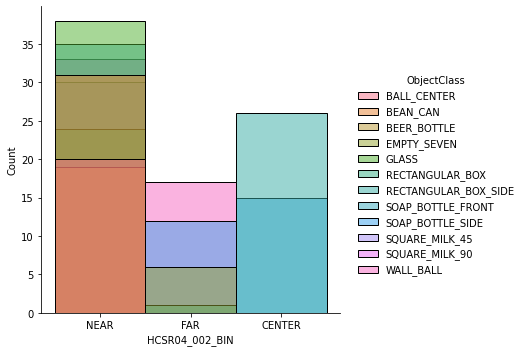

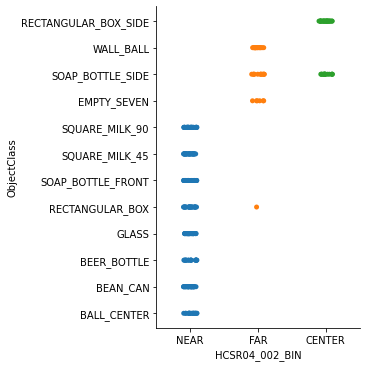

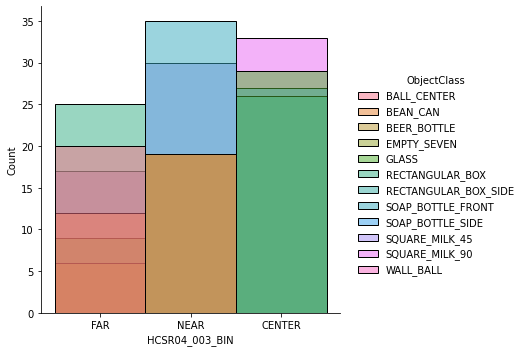

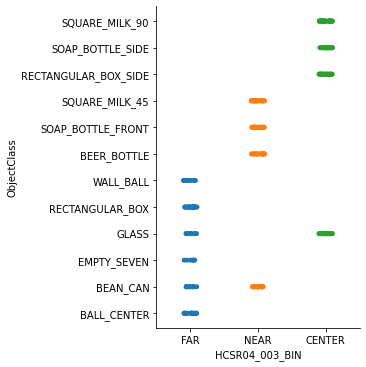

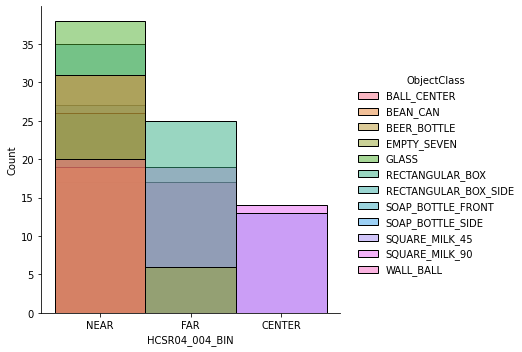

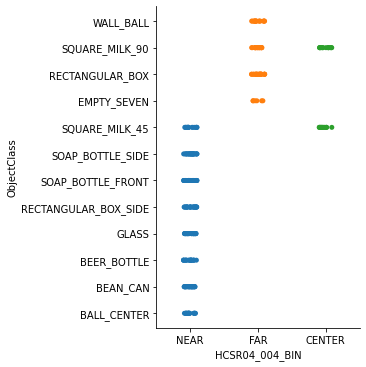

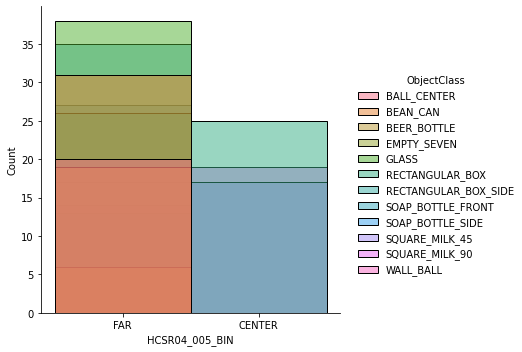

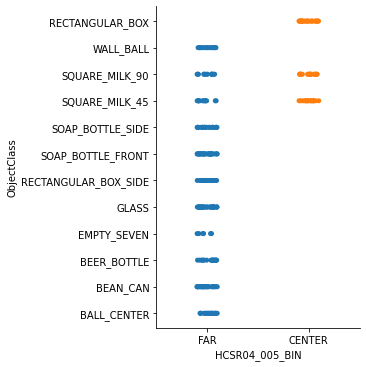

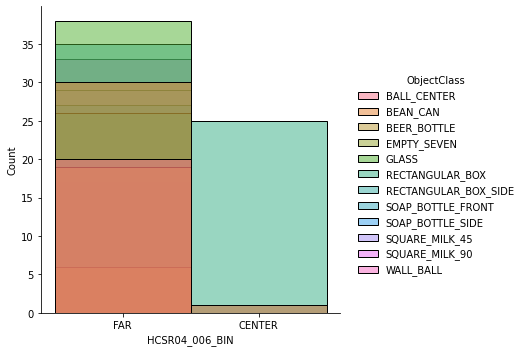

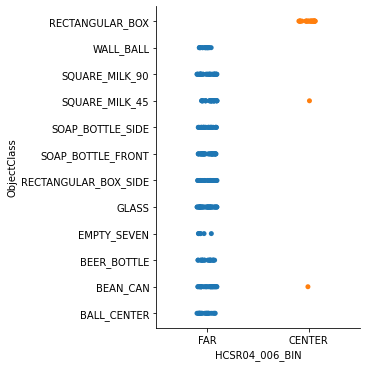

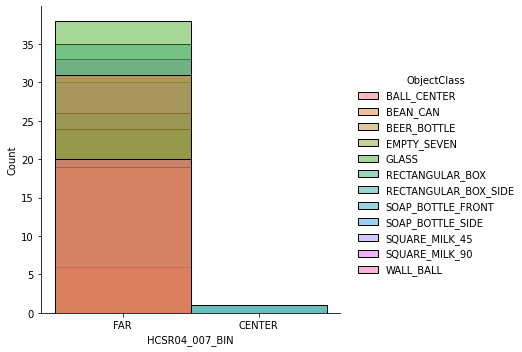

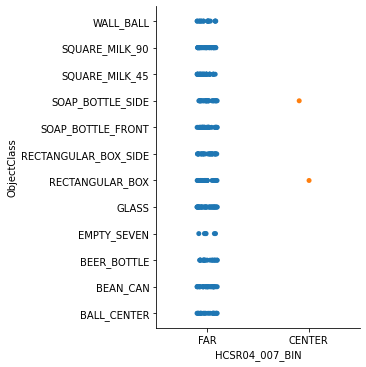

In [41]:
for colName in names:
    sns.displot(data, x=colName ,hue="ObjectClass") 
    sns.catplot(x=colName, y="ObjectClass", data=data)

Il range delle distanze stimate dai sensori HCSR04_007 e HCSR04_006 sono molto supeiore ai valori attesi. L'analisi dei dati provenienti da questi sensori è stata approfondita dei paragrafi che seguono.

## Analisi correlazione


In [43]:
# The data is categorial so I convert it with LabelEncoder to transfer to ordinal.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in names:
    data[column] = labelencoder.fit_transform(data[column])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'ObjectClass'),
  Text(0, 1.5, 'HCSR04_001_empty'),
  Text(0, 2.5, 'HCSR04_002_empty'),
  Text(0, 3.5, 'HCSR04_003_empty'),
  Text(0, 4.5, 'HCSR04_004_empty'),
  Text(0, 5.5, 'HCSR04_005_empty'),
  Text(0, 6.5, 'HCSR04_006_empty'),
  Text(0, 7.5, 'HCSR04_007_empty'),
  Text(0, 8.5, 'HCSR04_001_BIN'),
  Text(0, 9.5, 'HCSR04_002_BIN'),
  Text(0, 10.5, 'HCSR04_003_BIN'),
  Text(0, 11.5, 'HCSR04_004_BIN'),
  Text(0, 12.5, 'HCSR04_005_BIN'),
  Text(0, 13.5, 'HCSR04_006_BIN'),
  Text(0, 14.5, 'HCSR04_007_BIN')])

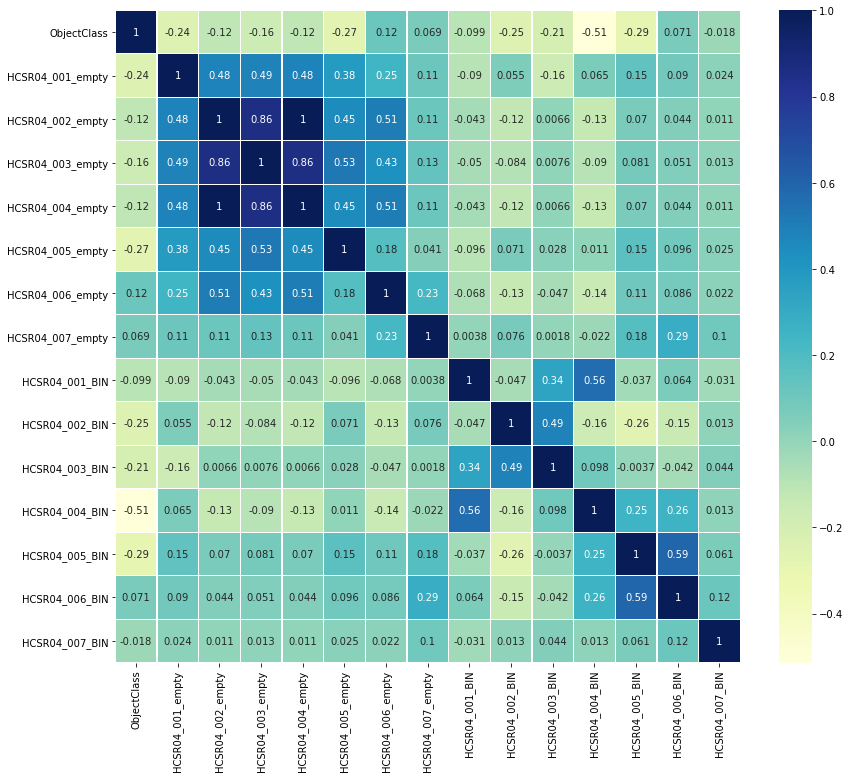

In [44]:
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

## Dataset di training

Sono stati preparati due distinti dataset di training: 
- dataset completo 
- senza dati HCSR-04_007

I due dataset saranno utiolizzati per addestrare diversi modelli con lo scopo di verificare sperimentalmente quale modello ha le migliori prestazioni in condizioni operative realistiche

In [ ]:
x_train_all = data[['HCSR04_001','HCSR04_002','HCSR04_003','HCSR04_004','HCSR04_005','HCSR04_006','HCSR04_007']]
y_train_all = data[['ObjectClass']]

In [ ]:
x_train_NO_007 = data[['HCSR04_001','HCSR04_002','HCSR04_003','HCSR04_004','HCSR04_005','HCSR04_006']]
y_train_NO_007 = data[['ObjectClass']]

In [ ]:
x_test= [30,35,30,35,20,50,100]

## Classificatore Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
clf.fit(x_train_all, np.ravel(y_train_all))

In [ ]:
import pickle

filename='../models/rf_classificator_model_pickle_outline_removed_PI.pkl'
filenameONNX='../models/rf_classificator_model_pickle_outline_removed_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('distances', FloatTensorType([None, 7]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open(filenameONNX, "wb") as f:
    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

In [ ]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
clf.fit(x_train_NO_007, np.ravel(y_train_NO_007))

In [ ]:
import pickle

filename='../models/rf_classificator_model_pickle_outline_removed_NO_007_PI.pkl'
filenameONNX='../models/rf_classificator_model_pickle_outline_removed_NO_007_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('distances', FloatTensorType([None, 7]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open(filenameONNX, "wb") as f:
    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

## Addestramento modello SVM

### Modello addestrato su dataset completo

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_all, np.ravel(y_train_all))

#### Salvataggio Modello addestrato

In [ ]:
import pickle

filename='../models/svm_classificator_model_pickle_outline_removed_PI.pkl'
filenameONNX='../models/svm_classificator_model_pickle_outline_removed_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# convert_sklearn non supporata questo modello

#from skl2onnx import convert_sklearn
#from skl2onnx.common.data_types import FloatTensorType

#initial_type = [('distances', FloatTensorType([None, 7]))]
#onx = convert_sklearn(clf, initial_types=initial_type)
#with open(filenameONNX, "wb") as f:
#    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

#### Test Classificatore

In [ ]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.predict([x_test])

### Modello addestrato senza HCSR04_007

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_NO_007, np.ravel(y_train_NO_007))

In [ ]:
cross_val_score(clf, x_train_all, np.ravel(y_train_all), cv=3, scoring="accuracy")

#### Salvataggio Modello addestrato

In [ ]:
import pickle
filename='../models/svm_classificator_model_pickle_outline_removed_NO_007_PI.pkl'
filenameONNX='../models/svm_classificator_model_pickle_outline_removed_NO_007_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
#from skl2onnx import convert_sklearn
f#rom skl2onnx.common.data_types import FloatTensorType

#initial_type = [('distances', FloatTensorType([None, 7]))]
#onx = convert_sklearn(clf, initial_types=initial_type)
#with open(filenameONNX, "wb") as f:
   # f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

#### Test Classificatore

In [ ]:
x_test[0:6]

In [ ]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.predict([x_test[0:6]])

## Addestramento LinearSVC

reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0))
clf.fit(x_train_all, np.ravel(y_train_all))

In [ ]:
cross_val_score(clf, x_train_all, np.ravel(y_train_all), cv=3, scoring="accuracy")

In [ ]:
import pickle
filename='linearSVC_classificator_model_pickle_outline_removed_PI.pkl'
filenameONNX='linearSVC_classificator_model_pickle_outline_removed_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('distances', FloatTensorType([None, 7]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open(filenameONNX, "wb") as f:
    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

Test

In [ ]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.predict([x_test])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import numpy as np
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0))
clf.fit(x_train_NO_007, np.ravel(y_train_NO_007))

In [ ]:
import pickle
filename='linearSVC_classificator_model_pickle_outline_removed_NO_007_PI.pkl'
filenameONNX='linearSVC_classificator_model_pickle_outline_removed_NO_007_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('distances', FloatTensorType([None, 7]))]
onx = convert_sklearn(clf, initial_types=initial_type)
with open(filenameONNX, "wb") as f:
    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

## Addestramento KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf.fit(x_train_all, np.ravel(y_train_all))

In [ ]:
cross_val_score(clf, x_train_all, np.ravel(y_train_all), cv=3, scoring="accuracy")

In [ ]:
import pickle
filename='knn_classificator_model_pickle_outline_removed_PI.pkl'
filenameONNX='knn_classificator_model_pickle_outline_removed_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# Not implemented in convert_sklearn for KNN model
#from skl2onnx import convert_sklearn
#from skl2onnx.common.data_types import FloatTensorType

#initial_type = [('distances', FloatTensorType([None, 7]))]
#onx = convert_sklearn(clf, initial_types=initial_type)
#with open(filenameONNX, "wb") as f:
#    f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)

Test

In [ ]:
load_lr_model =pickle.load(open(filename, 'rb'))
load_lr_model.predict([x_test])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
clf = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf.fit(x_train_NO_007, np.ravel(y_train_NO_007))

In [ ]:
import pickle
filename='knn_classificator_model_pickle_outline_removed_NO_007_PI.pkl'
filenameONNX='knn_classificator_model_pickle_outline_removed_NO_007_PI.onnx'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# Not implemented in convert_sklearn for KNN model
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import FloatTensorType

# initial_type = [('distances', FloatTensorType([None, 7]))]
# onx = convert_sklearn(clf, initial_types=initial_type)
# with open(filenameONNX, "wb") as f:
 #   f.write(onx.SerializeToString())

# Only for google.colab

#from google.colab import files
# files.download(filename)
# files.download(filenameONNX)